In [26]:
import pandas as pd
import numpy as np

In [27]:
test_data=pd.read_csv('counterfeit_test.csv')
train_data=pd.read_csv('counterfeit_train.csv')
df_test=pd.DataFrame(test_data)
print(df_test.isnull().sum())


Medicine_ID              0
Counterfeit_Weight     297
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
dtype: int64


In [30]:
df_train=pd.DataFrame(train_data)
print(df_train.isnull().sum())

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64


In [31]:
df_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [32]:
#Get the essential libraries
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
or_data = pd.read_csv("counterfeit_train.csv")
or_data.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [34]:
or_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [35]:
print(or_data['Medicine_ID'].value_counts())
print(or_data['Area_Type'].value_counts())
print(or_data['Area_dist_level'].value_counts())

RQS74    9
SCK30    9
HQH91    9
OQH15    9
QLK14    9
        ..
QEG60    1
HOA15    1
ADE15    1
XSM88    1
OPM10    1
Name: Medicine_ID, Length: 1557, dtype: int64
DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64
Medium     2203
Unknown    1938
Small      1928
High        749
Name: Area_dist_level, dtype: int64


In [36]:
or_data.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [37]:
or_data.isna().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [38]:
or_data.corr()['Counterfeit_Sales']

Counterfeit_Weight     0.005959
Active_Since          -0.039595
Medicine_MRP           0.573684
Availability_rating   -0.124058
Counterfeit_Sales      1.000000
Name: Counterfeit_Sales, dtype: float64

<AxesSubplot:>

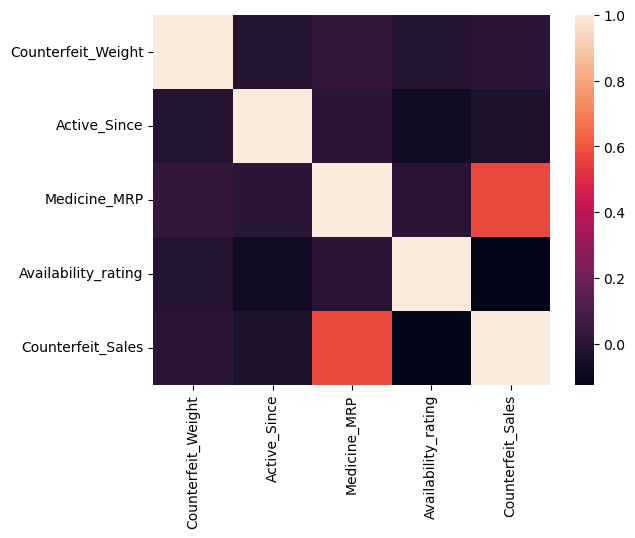

In [39]:
cor = or_data.corr()
sns.heatmap(cor)

In [40]:
or_data.drop('Counterfeit_Weight',axis = 1 , inplace = True)
or_data.head()

,Medicine_ID,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [41]:
or_data.drop('Medicine_ID',axis = 1 , inplace = True)
or_data.head()

,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [42]:
or_data.drop('DistArea_ID',axis = 1 , inplace = True)
or_data.head()

,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [43]:
or_data.drop('Active_Since',axis = 1 , inplace = True)
or_data.head()

,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [44]:
or_data = pd.get_dummies(data = or_data,drop_first=True)
or_data.head()

,Medicine_MRP,Availability_rating,Counterfeit_Sales,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,Medicine_Type_Antimalarial,Medicine_Type_Antipyretics,Medicine_Type_Antiseptics,Medicine_Type_Antiviral,...,Medicine_Type_Tranquilizers,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
0,160.2366,0.070422,1775.5026,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,110.4384,0.013000,3069.1520,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,259.4092,0.060783,2603.0920,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,99.9830,0.065555,1101.7130,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,56.4402,0.248859,158.9402,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
X = or_data.drop('Counterfeit_Sales',axis = 1)
X.head()

,Medicine_MRP,Availability_rating,Medicine_Type_Antacids,Medicine_Type_Antibiotics,Medicine_Type_Antifungal,Medicine_Type_Antimalarial,Medicine_Type_Antipyretics,Medicine_Type_Antiseptics,Medicine_Type_Antiviral,Medicine_Type_Cardiac,...,Medicine_Type_Tranquilizers,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
0,160.2366,0.070422,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,110.4384,0.013000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,259.4092,0.060783,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0
3,99.9830,0.065555,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,56.4402,0.248859,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
Y = or_data[['Counterfeit_Sales']]
Y.head()

,Counterfeit_Sales
0,1775.5026
1,3069.1520
2,2603.0920
3,1101.7130
4,158.9402


In [47]:
#Fit the Linear regressor on the training data

lm = linear_model.LinearRegression()

lm.fit(X,Y)

LinearRegression()

In [48]:
# save the model to disk
import pickle
filename = 'finalized_model_2.sav'
pickle.dump(lm, open(filename, 'wb'))

In [51]:
#### Loading the model 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X,Y)
print(result)

0.5675643581860341
